**提升（Boosting）一族算法的基本思想**：
- 先从初始训练集训练一个基学习器
- 再根据基学习器表现调整样本分布
- 基于调整后的样本分布训练下一个学习器（使先前出错的样本得到更多关注）
- 学习器达到预设数量后停止训练，将所有的学习的进行线性组合，作为最后的模型

AdaBoost（Adaptive Boosting）是Boosting族中一个典型的**分类算法**。

# AdaBoost算法解决二分类问题的流程
输入：
- 训练数据集$T={(x_1,y_1),(x_2,y_2),...,(x_N,y_N)}$，其中$x_i \in \chi \subseteq R^n$，$y_i \in \gamma=\{-1,+1\}$
- 弱学习算法

输出：最终分类器$G(x)$


**具体流程**
1. 初始化训练数据的权值
$$D_1=(\omega_{11},...,\omega_{1i},...,\omega_{1N})，\omega_{1i}=\frac{1}{N}，i=1,2,...,N$$
    -  初始时设置所有训练数据的权值相等
2. for m= 1 to M：  # M是基分类器数量
    1. 使用具有权值$D_m$的训练数据学习，获得到基分类器$$G_m(x)$$
    2. 计算$G_m(x)$在训练集上的分类误差率$$e_m=\sum_{i=1}^{N}P(G_m(x_i)≠y_i)=\sum_{G_m(x_i)≠y_i}\omega_{mi} \qquad, \omega_{mi}是第m论中第i个实例的权值$$
        - 理解分类误差率：右边等号表示**分类器的分类误差率等于错分样本的权值之和（样本的权值分布随迭代可能变成非等概的）**。
    3. 计算$G_m(x)$的系数$$\alpha_m=\frac{1}{2}In \frac{1-e_m}{e_m}$$
        - 定性理解基分类器的系数：由于分类误差率$e_m ≥0$。当$e_m≤\frac{1}{2}$时，$\alpha_m ≥ 0$，且$e_m$越小，$\alpha_m$越大。**即误差率越小，基分类器的系数（影响力）就越大**。
    4. 更新训练集权值分布$$D_{m_1}=(\omega_{m+1,1},...,\omega_{m+1,i},...,\omega_{m+1,N})$$，其中$$\omega_{m+1,i}=\frac{\omega_{mi}}{Z_m}e^{(-\alpha_m y_iG_m(x_i))}, \qquad i=1,2,...,N$$或$$\omega_{m+1,i}=\left\{\begin{matrix} 
  \frac{\omega_{mi}}{Z_m}e^{-\alpha_m}, G_m(x_i)=y_i \\
  \frac{\omega_{mi}}{Z_m}e^{\alpha_m} , G_m(x_i)\neq y_i
\end{matrix}\right.$$ $Z_m$是规范化因子$$Z_m=\sum_{i=1}^{N}\omega_{mi}e^{(-\alpha_m y_i G_m(x_i))}$$
        - **训练数据集权值分布的调整策略**是：提高上个基分类器中错分类样本的权值
3. 构建基分类器的线性组合$$f(x)=\sum_{m=1}^{M} \alpha_m G_m(x)$$，得到最终分类器
$$G(x)=sign(f(x))$$


**遗留问题**：
1. 如何确定基分类$G_m$以及其系数$\alpha_m$？
    - 这个问题的推导见下面“损失函数的优化”一节
2. 如何理解权值更新步骤的公式？

# AdaBoost解决回归问题的流程
AdaBoost回归算法变种很多，下面的算法为Adaboost R2回归算法过程。

输入：
- 训练数据集$T={(x_1,y_1),(x_2,y_2),...,(x_N,y_N)}$，其中$x_i \in \chi \subseteq R^n$，$y_i \in \gamma=\{-1,+1\}$
- 弱学习算法

输出：强学习器$f(x)$

**具体流程**
1. 初始化训练数据的权值
$$D_1=(\omega_{11},...,\omega_{1i},...,\omega_{1N})，\omega_{1i}=\frac{1}{N}，i=1,2,...,N$$
    -  初始时设置所有训练数据的权值相等
2. for m= 1 to M：  # M是基学习器数量
    1. 使用具有权值$D_m$的训练数据学习，获得到基学习器$$G_m(x)$$
    2. 计算$G_m(x)$在训练集上的最大误差$$E_m=max|y_i-G_m(x_i)|,i=1,2,...,N$$
    3. 计算每个样本的相对误差（有以下几种不同的计算方式）
        - 定义为线性误差时：$$e_{mi}=\frac{|y_i-G_m(x_i)|}{E_m}$$
        - 定义为平方误差时：$$e_{mi}=\frac{(y_i-G_m(x_i))^2}{E_m^2}$$
        - 定义为指数误差时：$$e_{mi}=1-e^{\frac{-|y_i-G_m(x_i)|}{E_m}}$$
    4. 计算回归误差率$$e_m=\sum_{i=1}^N \omega_{mi}e_{mi}$$
    5. 计算弱学习器的系数$$\omega_{m+1,i}=\frac{\omega_{mi}}{Z_m}\alpha_m^{1-e_{mi}}$$，其中$Z_m$是规范化因子$$Z_m=\sum_{i=1}^N \omega_{mi}\alpha_m^{1-e_mi}$$
3. 采用加权平均法最终得到强学习器$$f(x)=\sum_{m=1}^{M}(In\frac{1}{\alpha_m})G_m(x)$$


# AdaBoost算法的正则化
为防止AdaBoost过拟合，可以加入**正则化项（也称作步长）$\nu$**。对于迭代过程$$f_m(x)=f_{m-1}(x)+\alpha_m G_m(x)$$，加上正则化项后变成$$f_m(x)=f_{m-1}(x)+\nu\alpha_m G_m(x)$$，其中$0<\nu≤1$。

- 当$\nu$较小时，迭代次数M会增大，表示需要更多的弱学习器。

# 前向分布算法
AdaBoost算法是前向分布加法算法的特例。可以证明，当损失函数使用指数函数时，前向分布算法可以推出AdaBoost算法（见《统计学习方法 第二版》P164）。
## 加法模型
即目标函数为
$$f(x)=\sum_{m=1}^M \beta_m b(x;\gamma_m)$$
其中$\beta_m$是每个基函数的系数，$\gamma_m$是每个基函数的参数，$b(x;\gamma_m)$就是一个基函数。可见，基分类器的线性组合可以描述为基函数的线性组合。

## 前向分布算法
给定训练数据和损失函数$L(y,f(x))$时，加法模型的损失函数最小化问题是

<img src="AdaBoost优化目标.png" hight="30%" width="30%">

上述问题难以直接优化，因此采用**前向分布算法的思想：从前向后逐个训练分类器，每增加一个分类器都使得损失函数更小，逐步逼近最优解。**

**前向分布算法的具体步骤**：
1. 初始化$f_0(x)=0$
2. for m = 1 to M：
    - 最小化损失函数得到第m个基分类器的系数和参数
    
    <img src="前向分布算法最小化损失.png" hight="50%" width="50%">
    - 得到第m次迭代后的分类器
    <img src="更新函数.png" hight="50%" width="50%">
3. 得到加法模型$f(x)=f_m(x)=\sum_{m=1}^M \beta_m b(x;\gamma_m)$

## 损失函数的优化
AdaBoost分类算法使用的是指数损失函数，其形式如下
$$L(f(x),y)=\sum_{i=1}^N e^{-y_i f(x_i)}$$，其中$y_i$是标签值，$f(x_i)$是预测值。

那么，**如何优化损失函数，即确定基分类器$G_m$以及系数$\alpha_m$呢**？

**首先，这个优化问题可以描述为**$$(\alpha_m,G_m(x))=arg \ min_{\alpha,G}\sum_{i=1}^N e^{-y_i f_m(x_i)}$$。
由于$f_m(x_i)=f_{m-1}(x_i)+\alpha G(x_i)$，所以$$(\alpha_m,G_m(x))=arg \ min_{\alpha,G}\sum_{i=1}^N e^{-y_i f_{m-1}(x_i)-y_i\alpha G(x_i)}$$，如果令$\bar{\omega}_{mi}=e^{-y_if_{m-1}(x_i)}$，可见$\bar{\omega}_{mi}$不依赖$\alpha$和$G$，与最小化损失函数无关。但$\bar{\omega}_{mi}$依赖$f_{m-1}(x)$，这个值随每次迭代而变化。故$$(\alpha_m,G_m(x))=arg \ min_{\alpha,G}\sum_{i=1}^N \bar{\omega}_{mi}e^{-y_i \alpha G(x_i)}$$

**然后**，这个优化问题可以分两步解决（假设$\alpha_m^*$和$G_m^*(x)$是AdaBoost算法得到的$\alpha_m$和$G_m(x)$）：
1. 求$G_m^*(x)$
    - 因为$y_iG(x_i)=1（预测正确） 或 -1（预测错误）$，所以$$\sum_{i=1}^N \bar{\omega}_{mi}e^{-y_i \alpha G(x_i)}=\sum_{y_i≠G(x_i)}\bar{\omega}_{mi}e^\alpha+\sum_{y_i=G(x_i)}\bar{\omega}_{ki}e^{-\alpha}$$ $$=(e^\alpha-e^{-\alpha})\sum_{i=1}^N \bar{\omega}_{mi}I(y_i≠G(x_i))+e^{-\alpha}\sum_{i=1}^N \bar{\omega}_{mi}$$
    - 从上式可以得知$$G_m^*(x)=arg \ min_G \sum_{i=1}^N \bar{\omega}_{mi}I(y_i≠G(x_i))$$
2. 求$\alpha_m^*$
    - 将$G_m^*(x)$代入到损失函数，然后对$\alpha$求导，令其为0，可得$$\alpha_m^*=\frac{1}{2}In \frac{1-e_m}{e_m}$$，$e_m$是分类误差率。

求得系数和基学习器后就可以得出下一轮迭代的训练集权值分布。

# 实战
sklearn中的AdaBoost类库是AdaBoostClassifier（基于SAMME或SAMME.R）与AdaBoostRegressor（基于Adaboost.R2），前者用于分类，后者用于回归。

调参时，主要分为两部分：
1. AdaBoost框架相关
2. 基分类器相关

## AdaBoostClassifier和AdaBoostRegressor的框架参数
1. base_estimator：表示要使用的基学习器，这些基学习器需要支持权重和一些方法。默认是CART分类树（DecisionTreeClassifier），一般可以是决策树或神经网络。
    - 注：该属性支持AdaBoostClassifier和AdaBoostRegressor
2. algorithm：{'SAMME', 'SAMME.R'}, 默认是'SAMME.R'。表示具体实现的算法。两种算法的区别在于基学习器的权重度量。SAMME.R使用了对样本集分类的预测概率大小来作为基学习器权重，迭代较\`SAMME\`更快。
    - 注：
        - 该属性只支持AdaBoostClassifier
        - 当该属性是\`SAMME.R\`时，基学习器需要支持概率预测。
3. loss：{'linear', 'square', 'exponential'}, 默认是'linear'。这个参数就是AdaBoost回归算法中的样本相对误差。
    - 注：该属性只支持AdaBoostRegressor
4. n_estimators：int, default=50。表示迭代次数（最大的基学习器数）。**该值越大，容易过拟合；越小，容易欠拟合**。
    - 注：该属性支持AdaBoostClassifier和AdaBoostRegressor
5. learning_rate：float, 默认是1。这个就是正则化系数$\nu$，可以调整基学习器的贡献。
    - 注：该属性支持AdaBoostClassifier和AdaBoostRegressor

## AdaBoostClassifier和AdaBoostRegressor的基学习器参数
默认的基学习参数是CART分类树DecisionTreeClassifier和CART回归树DecisionTreeRegressor。

这部分的参数在CART决策树有介绍。

## AdaBoostClassifier实战

导入相关模块：

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

生成正态分布的随机数据：

In [7]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0, n_samples=500, n_features=2, n_classes=2, random_state=1)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)
#讲两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

可视化数据：

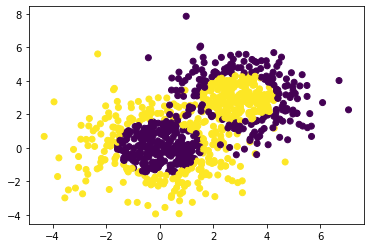

In [18]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

现在使用AdaBoostClassifier进行拟合，先进行建立模型、训练数据（200次迭代、学习率为0.8）：

In [19]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=200, 
                         learning_rate=0.8)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5,
                                                         min_samples_split=20),
                   learning_rate=0.8, n_estimators=200)

绘制拟合区域：

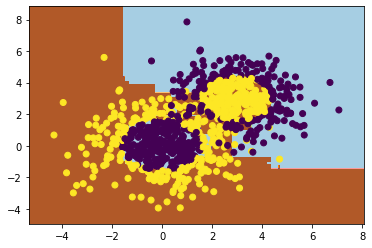

In [22]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

输出预测的精准率：

In [25]:
print("Score:", bdt.score(X,y))

Score: 0.9133333333333333


此时增加迭代次数到300，再次训练，再次预测的精准率：

In [27]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300,   # 
                         learning_rate=0.8)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.9622222222222222


可见迭代次数增加时，集成学习器拟合效果会变好。

保持迭代次数为300不变，再将学习率从0.8减小到0.5，再观察预测的精准率：

In [31]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.8944444444444445


可见基分类器不变时，减小学习率，拟合效果会下降。

## AdaBoostRegressor实战

首先随机生成100个样本。

分别建立CART回归树（深度为4）和AdaBoostRegressor模型（基学习器为深度为4的CART回归树，迭代次数为300），训练后将预测结果进行对比。

Automatically created module for IPython interactive environment


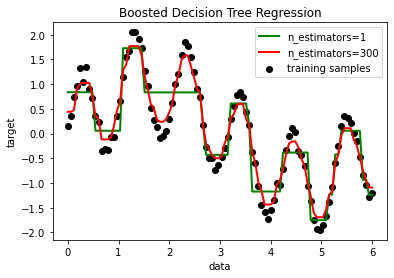

In [32]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

再查看两种模型的决定系数：

In [48]:
regr_1.score(X,y)

0.8569240975984329

In [49]:
regr_2.score(X,y)

0.9752198743918248

很明显AdaBoostRegressor模型效果更好。

# AdaBoost的优缺点
优点：
1. AdaBoost作为分类器时，分类精度很高
2. AdaBoost支持多种基学习器，使用很灵活
3. 作为简单的二元分类器时，构造简单，结果可理解
4. 不容易发生过拟合

缺点：
1. 异常样本敏感，异常样本在迭代中可能会获得较高的权重，影响最终的强学习器的预测准确性